## Liner regression

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [7]:
# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

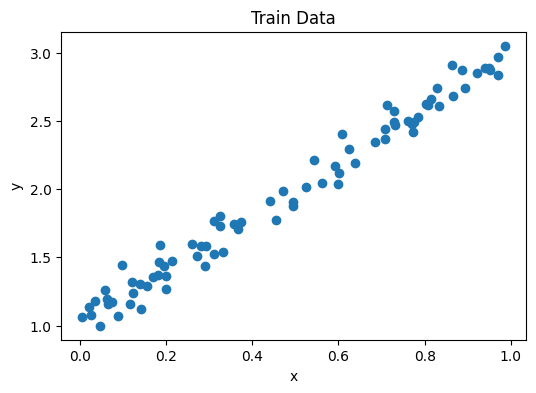

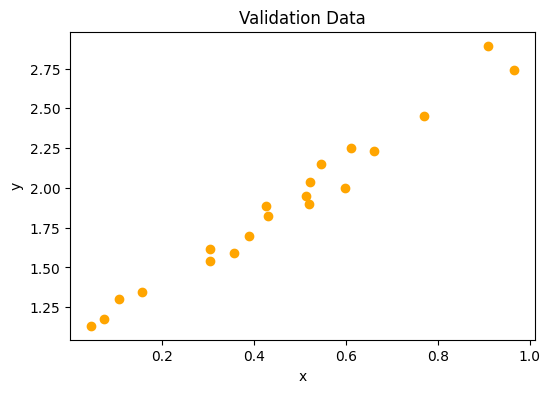

In [8]:
# Plotting the train data
plt.figure(1, figsize=(6, 4))
plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train Data')

# Plotting the validation data
plt.figure(2, figsize=(6, 4))
plt.scatter(x_val, y_val, color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Validation Data')

plt.show()

In [9]:
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(a, b)

[0.49671415] [-0.1382643]


In [10]:
# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

In [11]:
for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad

print(a, b)

[1.02354094] [1.96896411]


In [12]:
# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


In [13]:
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(a, b)

# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(a, b)

# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]
[1.02354075] [1.96896447]


## PyTorch

In [14]:
from torch import optim
from torch import nn

In [15]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using device:', device)

Using device: cpu


In [16]:
x_train_tensor = torch.from_numpy(x_train).to(device)
y_train_tensor = torch.from_numpy(y_train).to(device)

In [17]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, device=device)
b = torch.randn(1, requires_grad=True, device=device)

### Autograd

In [18]:
lr = 1e-1
epochs = 500
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, device=device)
b = torch.randn(1, requires_grad=True, device=device)
for epoch in range(epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    # 不用再自己計算梯度了 
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # 從 loss 做 backward 來幫我們取得梯度
    loss.backward()
    
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
    
    # 清除梯度
    a.grad.zero_()
    b.grad.zero_()
    
print(a, b)

tensor([1.0238], requires_grad=True) tensor([1.9684], requires_grad=True)


### 優化器（Optimizer）

In [19]:
lr = 1e-1
epochs = 500
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, device=device)
b = torch.randn(1, requires_grad=True, device=device)
optimizer = optim.SGD([a, b], lr=lr)
for epoch in range(epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    loss.backward() 
    # 不用手動更新梯度
    # a -= lr * a.grad
    # b -= lr * b.grad
    optimizer.step()
    
    # 不用自己將梯度清零
    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
print(a, b)


tensor([1.0238], requires_grad=True) tensor([1.9684], requires_grad=True)


### Loss

In [20]:
lr = 1e-1
epochs = 500
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, device=device)
b = torch.randn(1, requires_grad=True, device=device)
optimizer = optim.SGD([a, b], lr=lr)
# 指定一個 loss function
MSELoss = nn.MSELoss()
for epoch in range(epochs):
    yhat = a + b * x_train_tensor
    # 不用再自己算 loss 了
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = MSELoss(y_train_tensor, yhat)
    loss.backward() 
    optimizer.step()
    optimizer.zero_grad()
print(a, b)


tensor([1.0238], requires_grad=True) tensor([1.9684], requires_grad=True)


### Model

In [21]:
class PyTorchLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # 使用 nn.Parameter 來表示 a, b 為參數
        self.a = nn.Parameter(torch.randn(1, requires_grad=True))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True))
        
    def forward(self, x):
        # 計算我們的輸出，也就是預測
        return self.a + self.b * x

In [22]:
lr = 1e-1
epochs = 500
torch.manual_seed(42)
model = PyTorchLinearRegression()#.to(device)
MSELoss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
for epoch in range(epochs):
    model.train()
    # 不用再手動做 output 了
    # yhat = a + b * x_tensor
    yhat = model(x_train_tensor)
    loss = MSELoss(y_train_tensor, yhat)
    loss.backward() 
    optimizer.step()
    optimizer.zero_grad()
print(a, b)


tensor([1.0238], requires_grad=True) tensor([1.9684], requires_grad=True)


In [23]:
# 建立一個有完整訓練過程的函數
def build_train_step(model, loss_fn, optimizer):
    
    def train_step(x, y):
        
        # 訓練模式
        model.train()
        
        # 預測
        yhat = model(x)
        
        # 計算 loss
        loss = loss_fn(y, yhat)
        
        # 計算梯度
        loss.backward()
        
        # 更新參數並清零梯度
        optimizer.step() 
        optimizer.zero_grad()
        
        # 回傳 loss
        return loss.item()
    
    # 回傳會在函數內被呼叫的訓練過程
    return train_step
# 以我們定義好的 model, lossfunction 和 optimizer 來建立 train_step
train_step = build_train_step(model, MSELoss, optimizer)
for epoch in range(epochs):
    # 執行一次訓練並回傳 loss
    loss = train_step(x_train_tensor, y_train_tensor)
    
# 確認參數
print(model.state_dict())

OrderedDict([('a', tensor([1.0235])), ('b', tensor([1.9690]))])


### Dataset

In [24]:
from torch.utils.data import Dataset
class SLRDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        
    def __getitem__(self, index):
        return (self.x[index], self.y[index])
    def __len__(self):
        return len(self.x)
# 不用傳到 GPU 上
x_train_tensor = torch.from_numpy(x_train)
y_train_tensor = torch.from_numpy(y_train)
training_data = SLRDataset(x_train_tensor, y_train_tensor)
print(training_data[0])

(tensor([0.7713], dtype=torch.float64), tensor([2.4745], dtype=torch.float64))


### Dataloader

In [25]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=training_data, batch_size=16, shuffle=True)

### Evaluation

In [26]:
from torch.utils.data.dataset import random_split
from torch.utils.data import TensorDataset
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)
dataset = TensorDataset(x_tensor, y_tensor)
train_dataset, val_dataset = random_split(dataset, [80, 20])
train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

In [27]:
losses = []
val_losses = []
train_step = build_train_step(model, MSELoss, optimizer)
for epoch in range(epochs):
    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)
        loss = train_step(x, y)
        losses.append(loss)
        
    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(device)
            y = y.to(device)
            
            model.eval()
            yhat = model(x)
            val_loss = MSELoss(y, yhat)
            val_losses.append(val_loss.item())
print(model.state_dict())
print(losses[-1], val_losses[-1])

OrderedDict([('a', tensor([1.0192])), ('b', tensor([1.9670]))])
0.00828425793139238 0.004590431720140906
